<a href="https://colab.research.google.com/github/Medha-Shridharan/YSZ-Model/blob/main/yttrium_zirconium_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import optimize
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


#Yttrium Nitrate - KOH system

In [ ]:
#hydrolysis constants for yttrium
m1=-7.7
m2=-36.5
m3=-14.23
m4=-31.6
m5=-17.5
m6=-8.5
kw=-14

In [ ]:
def calc_yt_conc(y):
  # y is the variable y10 for log[OH-]
  #print(ck)
  yt = np.zeros(11)
  yt[8] = math.log10(ck) #lgk
  yt[9] = math.log10(3*cn) #lgn
  yt[10] = math.log10(y) #lgoh, y is not the same as ck
  yt[7] = kw - yt[10] #lgh
  yt[1] = 3*yt[7] - m5
  yt[2] = m1 + yt[1] - yt[7]
  yt[3] = m2 + yt[1] - 4*yt[7]
  yt[4] = m3 + 2*yt[1] - 2*yt[7]
  yt[5] = m4 + 3*yt[1] - 5*yt[7]
  yt[6] = m6
  return(yt)

In [ ]:
def calc_yt_netcharge(y):
  # y is the variable y10 for log[OH-]
  yt = np.zeros(11)
  yt = calc_yt_conc(y)
  pos = 3*10**yt[1] + 2*10**yt[2] + 4*10**yt[4] + 4*10**yt[5] + 10**yt[7] + 10**yt[8]
  neg = 10**yt[3] + 10**yt[9] + 10**yt[10]
  net = pos - neg
  return(net)

In [ ]:
def calc_yt_solubility(yt):
  syt = 10**yt[1] + 10**yt[2] + 10**yt[3] + 10**yt[4] + 10**yt[5] + 10**yt[6]
  return(syt)

In [ ]:
#test functions defined above
ck=0.1 #define concentration of KOH
cn=0.1 #define concentration of yttrium nitrate
y = np.zeros(10)
y=calc_yt_conc(0.1)
netcharge = calc_yt_netcharge(0.1)
syt = calc_yt_solubility(y)
print('concentrations of yttrium species =',y)
print('net charge for yttrium system =',netcharge)
print('solubility of yttrium=',syt)
print('deg of supersaturation of yttrium =',cn/syt)

concentrations of yttrium species = [  0.         -21.5        -16.2         -6.         -31.23
 -31.1         -8.5        -13.          -1.          -0.52287875
  -1.        ]
net charge for yttrium system = -0.30000099999989993
solubility of yttrium= 1.0031622777232645e-06
deg of supersaturation of yttrium = 99684.76907540408


In [ ]:
yt = np.zeros(10)
pH_values = []
ck_values = []
cn_values = []
syt_values = []
dss_yt_values = []
for x in range (1,5000):
  cn = 0.5
  ck = x/1000 #between 0.001M and 5M increasing in 0.0001M each iteration, KOH added to solution
  a = 1e-20 #lower bound concentration
  b = ck #upper bound concentration
  try:
    # for each given KOH concentration, what is the OH concentration at which net charge is 0 ("correct" amount of dissociation of KOH)
    # lets us find the [OH] and pH of the solution for each [KOH] iterated through
    # root found by algo is [OH]

    root,results = optimize.toms748(calc_yt_netcharge,a,b,full_output=True)
    yt = calc_yt_conc(root) #finds concs of all yt species for the concentration of KOH added
    pH = -(kw - yt[10]) #finds pH for the concentration of KOH added
    syt = calc_yt_solubility(yt) #finds syt for the conc of KOH added -> when plotted in contour, will be diff value for each [KOH] (directly affects by pH) and cn (affects by net charge)
    dss_yt = cn / syt #finds dss_yt
    cn_values.append(cn) #constant at 0.5
    ck_values.append(ck) #depends on iteration in for loop
    pH_values.append(pH)
    syt_values.append(syt)
    dss_yt_values.append(dss_yt)
    #print('ck =', ck ,' ,cn=' , cn , ' pH =', pH , 'syt=',syt,' net=', calc_netcharge(root))
  except:
    #print('ck =',ck,' ,cn=',cn,', y10 =', yt[10], ' pH =', pH, 'net=', calc_netcharge(root), 'Skipping...')
    print(results) #print to see number of iterations, confirm convergence
    continue

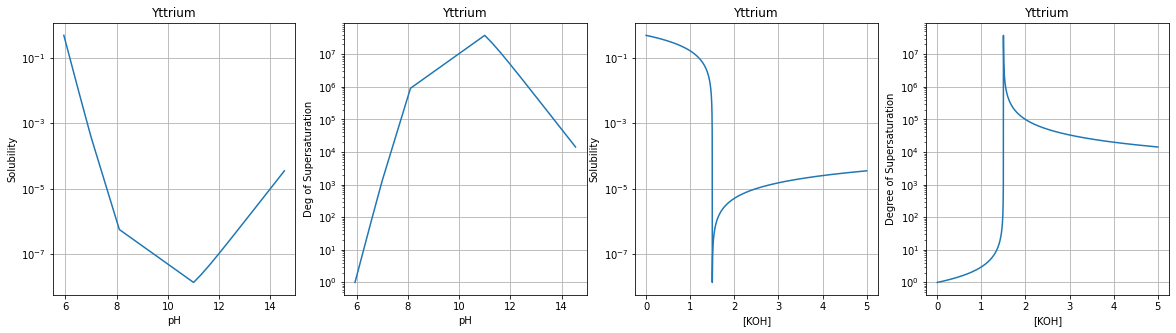

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
ax1.semilogy(pH_values,syt_values)
ax1.set(xlabel='pH', ylabel='Solubility', title='Yttrium')
ax1.grid()
ax2.semilogy(pH_values,dss_yt_values)
ax2.set(xlabel='pH', ylabel='Deg of Supersaturation', title='Yttrium')
ax2.grid()
ax3.semilogy(ck_values,syt_values)
ax3.set(xlabel='[KOH]', ylabel='Solubility', title='Yttrium')
ax3.grid()
ax4.semilogy(ck_values,dss_yt_values)
ax4.set(xlabel='[KOH]', ylabel='Degree of Supersaturation', title='Yttrium')
ax4.grid()

#Zirconyl Chloride - KOH System

In [ ]:
#hydrolysis constants for zirconium
k1=0.3
k2=-1.7
k3=-5.1
k4=-9.7
k5=-16
k6=-0.6
k7=-3.7
k8=6
k9=-1.9
k10=-2.57
kw=-14

In [ ]:
def calc_zr_conc(x):
  # x is the molar concentration of variable x12 - [OH-]
  #print(ck)
  zr = np.zeros(14)

  zr[12] = math.log10(x) #lgoh
  zr[13] = math.log10(ck) #lgk
  zr[10] = kw - zr[12] #lgh
  zr[1] = k9 + 4*zr[10]
  zr[2] = k1 + k9 + 3*zr[10]
  zr[3] = k2 + k9 + 2*zr[10]
  zr[4] = k3 + k9 + zr[10]
  zr[5] = k4 + k9
  zr[6] = k5 + k9 - zr[10]
  zr[7] = k6 + 3*k9 + 8*zr[10]
  zr[8] = k7 + 3*k9 + 7*zr[10]
  zr[9] = k8 + 4*k9 + 8*zr[10]
  zr[11] = math.log10(2*ccl) #lgcl

  return(zr)

In [ ]:
def calc_zr_netcharge(x):
# x is the molar concentration of variable x12 - [OH-]
  zr = np.zeros(14)
  zr = calc_zr_conc(x)
  pos = 4*10**zr[1] + 3*10**zr[2] + 2*10**zr[3] + 10**zr[4] + 8*10**zr[7] + 7*10**zr[8] + 8*10**zr[9] + 10**zr[10] + 10**zr[13]
  neg = 10**zr[6] + 10**zr[11] + 10**zr[12]
  net = pos - neg
  return(net)

In [ ]:
def calc_zr_solubility(zr):
  szr = 10**zr[1] + 10**zr[2] + 10**zr[3] + 10**zr[4] + 10**zr[5] + 10**zr[6] + 10**zr[7] + 10**zr[8] + 10**zr[9]
  return(szr)

In [ ]:
#test functions for zirconium as defined above
ck=0.1 #define concentration of KOH
ccl=0.1 #define concentration of zirconyl chloride
#zr = np.zeros(14)
zr=calc_zr_conc(0.1)
zr_netcharge = calc_zr_netcharge(0.1)
szr = calc_zr_solubility(zr)
print('concentrations of zirconium species =',zr)
print('net charge for zirconium system =',zr_netcharge)
print('solubility of zirconium=',szr)
print('deg of supersaturation of zirconium =',ccl/szr)

concentrations of zirconium species = [   0.       -53.9      -40.6      -29.6      -20.       -11.6
   -4.9     -110.3     -100.4     -105.6      -13.        -0.69897
   -1.        -1.     ]
net charge for zirconium system = -0.200012589254018
solubility of zirconium= 1.2589256629828156e-05
deg of supersaturation of zirconium = 7943.280762349907


In [ ]:
zr = np.zeros(14)
pH_values = []
ck_values = []
ccl_values = []
szr_values = []
dss_zr_values = []
for x in range (1,5000):
  ccl = 0.1
  ck = x/1000 #iterating [KOH] added to solution (0.001M and 5M)
  a = 1e-20 #lower bound concentration, arbitrary but not 0
  b = ck #upper bound concentration
  try:
    # for each given KOH concentration, what is the OH concentration at which net charge is 0 (identifies "correct" amount of dissociation of KOH)
    # lets us find the [OH] and pH of the solution for each [KOH] iterated through
    # root found by algo is [OH]

    root,results = optimize.toms748(calc_zr_netcharge,a,b,full_output=True)
    zr = calc_zr_conc(root) #finding list of solubility values for zr given the "correct" conc of OH in solution
    pH = -(kw - zr[12]) #for each value of KOH, what is the pH of the solution? (zr[12] is math.log10(root) according to how calc_zr_conc fn has been defined)
    szr = calc_zr_solubility(zr) #for each value of KOH, what is the solubility of zr? -> plotted in contour plot
    dss_zr = ccl / szr
    ccl_values.append(ccl) #constant
    ck_values.append(ck) #changes in each iteration
    pH_values.append(pH) #finds the range of pH values when iterated 0.001M to 5M KOH
    szr_values.append(szr)
    dss_zr_values.append(dss_zr)
    print('ck =', ck ,' ,ccl=' , ccl , ' pH =', pH , 'szr=',szr,' net=', calc_zr_netcharge(root))
  except:
    print('ck =',ck,' ,ccl=',ccl,', [OH-] =', zr[12], ' pH =', pH, 'net=', calc_zr_netcharge(root), 'Skipping...')
    print(results) #print to see number of iterations, confirm convergence
    continue

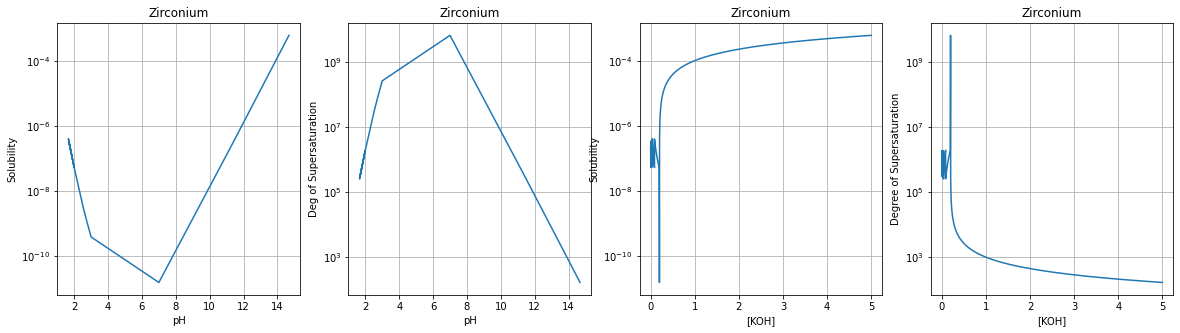

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
ax1.semilogy(pH_values,szr_values)
ax1.set(xlabel='pH', ylabel='Solubility', title='Zirconium')
ax1.grid()
ax2.semilogy(pH_values,dss_zr_values)
ax2.set(xlabel='pH', ylabel='Deg of Supersaturation', title='Zirconium')
ax2.grid()
ax3.semilogy(ck_values,szr_values)
ax3.set(xlabel='[KOH]', ylabel='Solubility', title='Zirconium')
ax3.grid()
ax4.semilogy(ck_values,dss_zr_values)
ax4.set(xlabel='[KOH]', ylabel='Degree of Supersaturation', title='Zirconium')
ax4.grid()

#Zirconyl Chloride - Yittrium Nitrate - KOH System

In [ ]:
def calc_yt_zr_netcharge(x):
  # x is the molar concentration of variable x12 - [OH-]
  zr = np.zeros(14)
  zr = calc_zr_conc(x)
  pos_zr = 4*10**zr[1] + 3*10**zr[2] + 2*10**zr[3] + 10**zr[4] + 8*10**zr[7] + 7*10**zr[8] + 8*10**zr[9] + 10**zr[13] # Remove + 10**zr[10] - avoid double count [H+] in Yt
  neg_zr = 10**zr[6] + 10**zr[11] # Remove + 10**zr[12] - avoid double count [OH-] in Yt

  # x is the variable y10 for log[OH-]
  yt = np.zeros(11)
  yt = calc_yt_conc(x)
  pos_yt = 3*10**yt[1] + 2*10**yt[2] + 4*10**yt[4] + 4*10**yt[5] + 10**yt[7] + 10**yt[8]
  neg_yt = 10**yt[3] + 10**yt[9] + 10**yt[10]

  net = pos_zr - neg_zr + pos_yt - neg_yt
  return(net)

In [ ]:
#test calc_yt_zr_netcharge function for an arbitary value of [OH-]
ck = 0.1 #define concentration of KOH
cn = 0.1 #define concentration of yttrium nitrate
ccl = 0.1 #define concentration of zirconyl chloride
yt_zr_netcharge = calc_yt_zr_netcharge(0.1) #this is assuming that [OH-] is 0.1 (same as ck)
print('net charge for yttrium-zirconium system =', yt_zr_netcharge)

net charge for yttrium-zirconium system = -0.40001358925401787


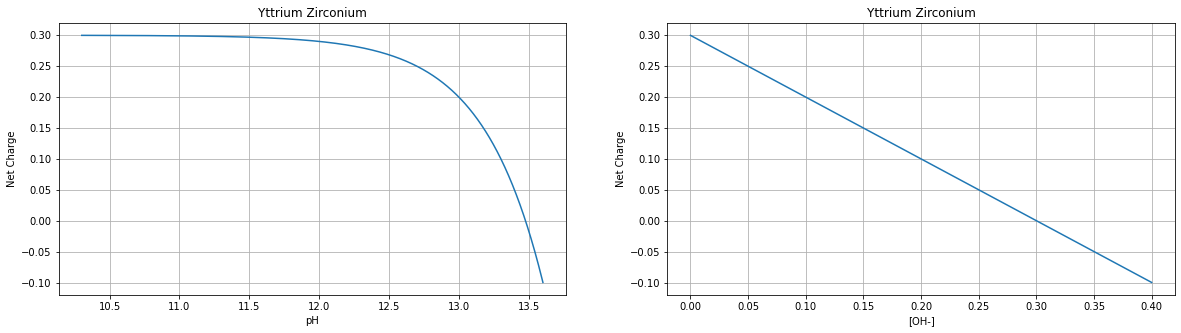

In [ ]:
# test for zero crossing of net charge for a range of [OH-] values
# change values for ck, cn and ccl to see if solution exists
# for high concentrations of ck (>0.5) and low concentrations of ccl,cn, and vice versa, solution does not exist
ck = 0.4 #define concentration of KOH
cn = 0.1 #define concentration of yttrium nitrate
ccl = 0.1 #define concentration of zirconyl chloride
yt_zr_netcharge = []
oh_conc = []
pH_list = []

for x in range (1,2000):
  #trying to find a graph of net charge against pH to find the pH at which net charge is 0 (solution exists)
  guess_oh_val = x/5000 #0.0002M to 1M, estimation of OH value (cannot go above 0.5M as KOH is upper bound, just testing what happens between 0.5 and 1m)
  pH_list.append(-(kw - math.log10(guess_oh_val)))
  netcharge_val = calc_yt_zr_netcharge(guess_oh_val)
  yt_zr_netcharge.append(netcharge_val)
  oh_conc.append(guess_oh_val)
  #print("ck=",ck_val," netcharge=",netcharge_val)

plt.rcParams["figure.figsize"] = (20,5)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(pH_list,yt_zr_netcharge)
ax1.set(xlabel='pH', ylabel='Net Charge', title='Yttrium Zirconium')
ax1.grid()
ax2.plot(oh_conc,yt_zr_netcharge)
ax2.set(xlabel='[OH-]', ylabel='Net Charge', title='Yttrium Zirconium')
ax2.grid()


In [ ]:
#test root function toms748 to confirm correctness of answer using above plot
ck = 0.5 #define concentration of KOH
cn = 0.1 #define concentration of yttrium nitrate
ccl = 0.1 #define concentration of zirconyl chloride

a = 1e-20 #lower bound concentration
b = ck #upper bound concentration
root,results = optimize.toms748(calc_yt_zr_netcharge,a,b,full_output=True) #finds OH concentration for 0 net charge
zr = calc_zr_conc(root)
yt = calc_yt_conc(root)
pH = -(kw - zr[12])
szr = calc_zr_solubility(zr)
dss_zr = ccl / szr
syt = calc_yt_solubility(yt)
dss_yt = cn / syt
print('ck =', ck ,'ccl=' , ccl , ' pH =', pH , 'szr=',szr,' syt=', syt, 'net=', calc_yt_zr_netcharge(root))

ck = 0.5 ccl= 0.1  pH = 13.698910990964917 szr= 6.293772033518635e-05  syt= 5.002482907278374e-06 net= 0.0


# Vary KOH
In this section, the concentration of yttrium and zirconyl salts are fixed, and [KOH] varied. The solubility is plotted over a range of pH

these will be the points changed by the slider; for each KOH, syt and szr will need to be replotted

In [ ]:
yt = np.zeros(10)
zr = np.zeros(14)
pH_values = [] #list of pH values
ck_values = [] #list of KOH concentrations
cn_values =[] #list of Y(NO3)3 concentrations
ccl_values = [] #list of ZrOCl2 concentrations
szr_values = [] #solubility of zirconium
syt_values = [] #solubility of yttrium
dss_zr_values = [] #degree of supersaturation - Zirconium
dss_yt_values = [] #degree of supersaturation - Yttrium

cn = 0.1
ccl = 0.1
for x in range (1,500):
  ck = x/500 #0.002M to 1M
  a = 1e-20 #lower bound concentration
  b = ck #upper bound concentration
  try:
    root,results = optimize.toms748(calc_yt_zr_netcharge,a,b,full_output=True) #finding correct [OH] for given KOH in this iteration
    print('root is ', root)
    #solubility lists for zr and yt
    zr = calc_zr_conc(root)
    yt = calc_yt_conc(root)
    pH = -(kw - zr[12])
    szr = calc_zr_solubility(zr)
    dss_zr = ccl / szr
    syt = calc_yt_solubility(yt)
    dss_yt = cn / syt

    ccl_values.append(ccl) #constant
    ck_values.append(ck) #value found by iteration
    cn_values.append(cn) #constant
    pH_values.append(pH) #correct dissociated OH for this KOH conc

    szr_values.append(szr)
    dss_zr_values.append(dss_zr)

    syt_values.append(syt)
    dss_yt_values.append(dss_yt)

    print('cn=', cn, 'ck =', ck ,' ,ccl=' , ccl , ' [OH-]=', zr[12],  ' pH =', pH , 'szr=',szr,' net=', calc_yt_zr_netcharge(root))
  except:
    print('cn=', cn, 'ck =',ck,' ,ccl=',ccl,', [OH-] =', zr[12], ' pH =', pH, 'net=', calc_yt_zr_netcharge(root), 'Skipping...')
    #print(results) #print to see number of iterations, confirm convergence
    continue

root is  1.2500582548312253e-08
cn= 0.1 ck = 0.002  ,ccl= 0.1  [OH-]= -7.903069747662159  pH = 6.096930252337841 szr= 4.165773565211822e-12  net= -6.5503158452884236e-15
root is  1.2534503091850618e-08
cn= 0.1 ck = 0.004  ,ccl= 0.1  [OH-]= -7.9018928781991695  pH = 6.0981071218008305 szr= 4.169826555884332e-12  net= -2.4136764137372424e-07
root is  1.2568893929352854e-08
cn= 0.1 ck = 0.006  ,ccl= 0.1  [OH-]= -7.900702938822717  pH = 6.099297061177283 szr= 4.1739369396206376e-12  net= -1.2032066768030703e-05
root is  1.2603457885827345e-08
cn= 0.1 ck = 0.008  ,ccl= 0.1  [OH-]= -7.899510285461313  pH = 6.100489714538687 szr= 4.178069221999628e-12  net= -7.286633790792862e-08
root is  1.2638509466009732e-08
cn= 0.1 ck = 0.01  ,ccl= 0.1  [OH-]= -7.898304141944245  pH = 6.101695858055755 szr= 4.182261028154333e-12  net= -9.18709552877317e-14
root is  1.2673961519598811e-08
cn= 0.1 ck = 0.012  ,ccl= 0.1  [OH-]= -7.897087615804062  pH = 6.102912384195938 szr= 4.186501972263998e-12  net= -7.97

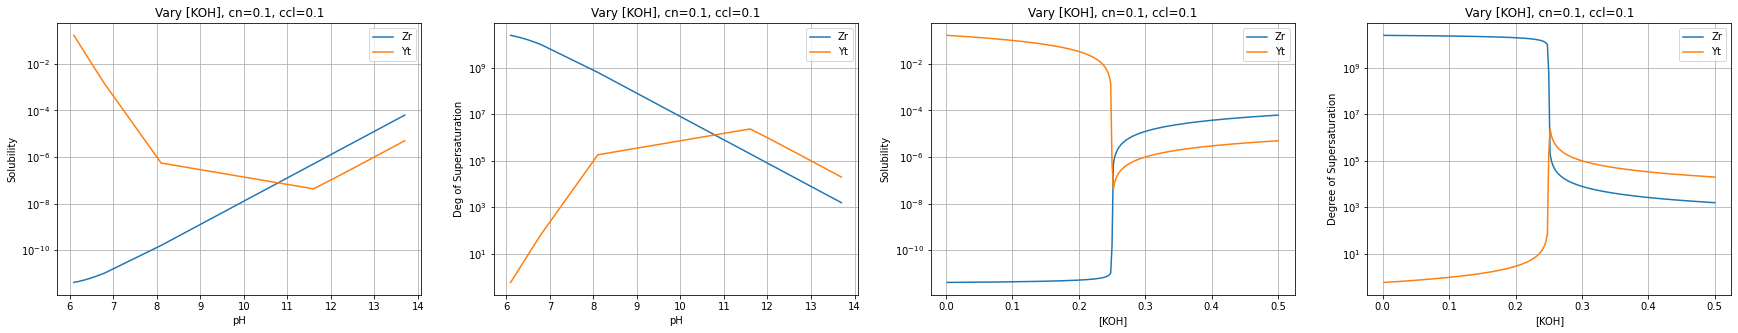

In [ ]:
plt.rcParams["figure.figsize"] = (30,5)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
titlestr = 'Vary [KOH], cn=' + str(cn) + ', ccl=' + str(ccl)
ax1.semilogy(pH_values,szr_values,pH_values,syt_values)
ax1.set(xlabel='pH', ylabel='Solubility', title=titlestr)
ax1.grid()
ax1.legend(['Zr','Yt'])
ax2.semilogy(pH_values,dss_zr_values, pH_values,dss_yt_values)
ax2.set(xlabel='pH', ylabel='Deg of Supersaturation', title=titlestr)
ax2.grid()
ax2.legend(['Zr','Yt'])
ax3.semilogy(ck_values,szr_values, ck_values,syt_values)
ax3.set(xlabel='[KOH]', ylabel='Solubility', title=titlestr)
ax3.grid()
ax3.legend(['Zr','Yt'])
ax4.semilogy(ck_values,dss_zr_values, ck_values,dss_yt_values)
ax4.set(xlabel='[KOH]', ylabel='Degree of Supersaturation', title=titlestr)
ax4.grid()
ax4.legend(['Zr','Yt'])

#Vary Yttrium
In this section, the concentration of yttrium nitrate is varied. The zirconyl salts and [KOH] are fixed. The solubility is plotted over a range of [YCl] added.

In [ ]:
yt = np.zeros(10)
zr = np.zeros(14)
pH_values = [] #list of pH values
ck_values = [] #list of KOH concentrations
cn_values =[] #list of Y(NO3)3 concentrations
ccl_values = [] #list of ZrCl3 concentrations
szr_values = [] #solubility of zirconium
syt_values = [] #solubility of yttrium
dss_zr_values = [] #degree of supersaturation - Zirconium
dss_yt_values = [] #degree of supersaturation - Yttrium

ccl = 0.1
ck = 0.1
for x in range (1,500):
  cn = x/500
  a = 1e-20 #lower bound concentration
  b = ck #upper bound concentration
  try:
    root,results = optimize.toms748(calc_yt_zr_netcharge,a,b,full_output=True)
    zr = calc_zr_conc(root)
    yt = calc_yt_conc(root)
    pH = -(kw - zr[12])
    szr = calc_zr_solubility(zr)
    dss_zr = ccl / szr
    syt = calc_yt_solubility(yt)
    dss_yt = cn / syt

    ccl_values.append(ccl)
    ck_values.append(ck)
    cn_values.append(cn)
    pH_values.append(pH)

    szr_values.append(szr)
    dss_zr_values.append(dss_zr)

    syt_values.append(syt)
    dss_yt_values.append(dss_yt)

    print('cn=', cn, ' ck =', ck ,' ,ccl=' , ccl , ' pH =', pH , 'szr=',szr,' net=', calc_yt_zr_netcharge(root))
  except:
    print('ck =',ck,' ,ccl=',ccl,', [OH-] =', zr[12], ' pH =', pH, 'net=', calc_yt_zr_netcharge(root), 'Skipping...')
    #print(results) #print to see number of iterations, confirm convergence
    continue

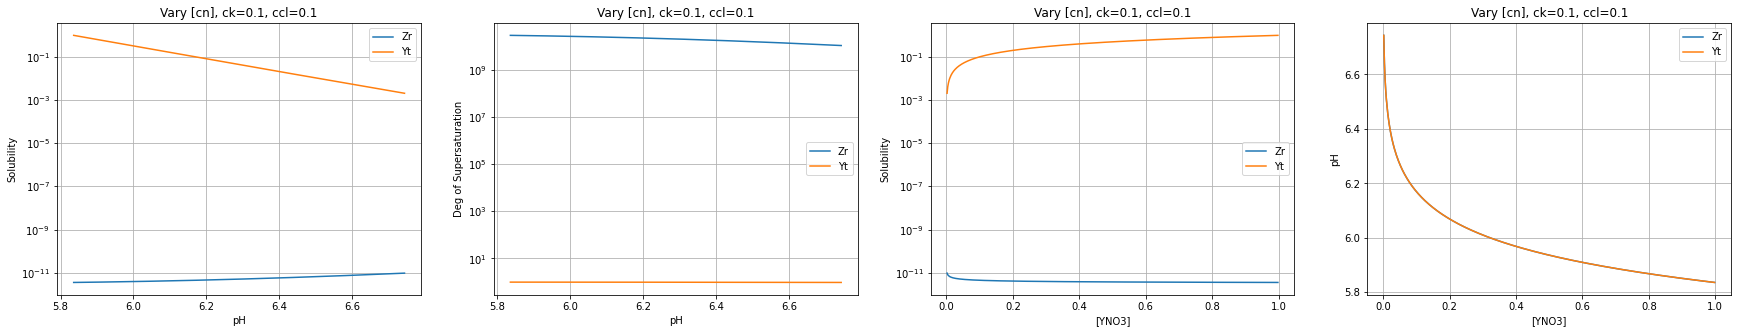

In [ ]:
plt.rcParams["figure.figsize"] = (30,5)
titlestr = 'Vary [cn], ck=' + str(ck) + ', ccl=' + str(ccl)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
ax1.semilogy(pH_values,szr_values,pH_values,syt_values)
ax1.set(xlabel='pH', ylabel='Solubility', title=titlestr)
ax1.grid()
ax1.legend(['Zr','Yt'])

ax2.semilogy(pH_values,dss_zr_values,pH_values,dss_yt_values)
ax2.set(xlabel='pH', ylabel='Deg of Supersaturation', title=titlestr)
ax2.grid()
ax2.legend(['Zr','Yt'])

ax3.semilogy(cn_values,szr_values,cn_values,syt_values)
ax3.set(xlabel='[YNO3]', ylabel='Solubility', title=titlestr)
ax3.grid()
ax3.legend(['Zr','Yt'])

ax4.plot(cn_values,pH_values,cn_values,pH_values)
ax4.set(xlabel='[YNO3]', ylabel='pH', title=titlestr)
ax4.grid()
ax4.legend(['Zr','Yt'])

#Vary Zirconyl Chloride
In this section, the concentration of zirconyl chloride is varied. The yttrium salts and [KOH] are fixed. The solubility is plotted over a range of [YCl] added.

In [ ]:
yt = np.zeros(10)
zr = np.zeros(14)
pH_values = [] #list of pH values
ck_values = [] #list of KOH concentrations
cn_values =[] #list of Y(NO3)3 concentrations
ccl_values = [] #list of ZrCl3 concentrations
szr_values = [] #solubility of zirconium
syt_values = [] #solubility of yttrium
dss_zr_values = [] #degree of supersaturation - Zirconium
dss_yt_values = [] #degree of supersaturation - Yttrium

cn = 0.1
ck = 0.1
for x in range (1,500):
  ccl = x/500
  a = 1e-20 #lower bound concentration
  b = ck #upper bound concentration
  try:
    root,results = optimize.toms748(calc_yt_zr_netcharge,a,b,full_output=True)
    zr = calc_zr_conc(root)
    yt = calc_yt_conc(root)
    pH = -(kw - zr[12])
    szr = calc_zr_solubility(zr)
    dss_zr = ccl / szr
    syt = calc_yt_solubility(yt)
    dss_yt = cn / syt

    ccl_values.append(ccl)
    ck_values.append(ck)
    cn_values.append(cn)
    pH_values.append(pH)

    szr_values.append(szr)
    dss_zr_values.append(dss_zr)

    syt_values.append(syt)
    dss_yt_values.append(dss_yt)

    print('cn=', cn, ' ck =', ck ,' ,ccl=' , ccl , ' pH =', pH , 'szr=',szr,' net=', calc_yt_zr_netcharge(root))
  except:
    print('ck =',ck,' ,ccl=',ccl,', [OH-] =', zr[12], ' pH =', pH, 'net=', calc_yt_zr_netcharge(root), 'Skipping...')
    #print(results) #print to see number of iterations, confirm convergence
    continue

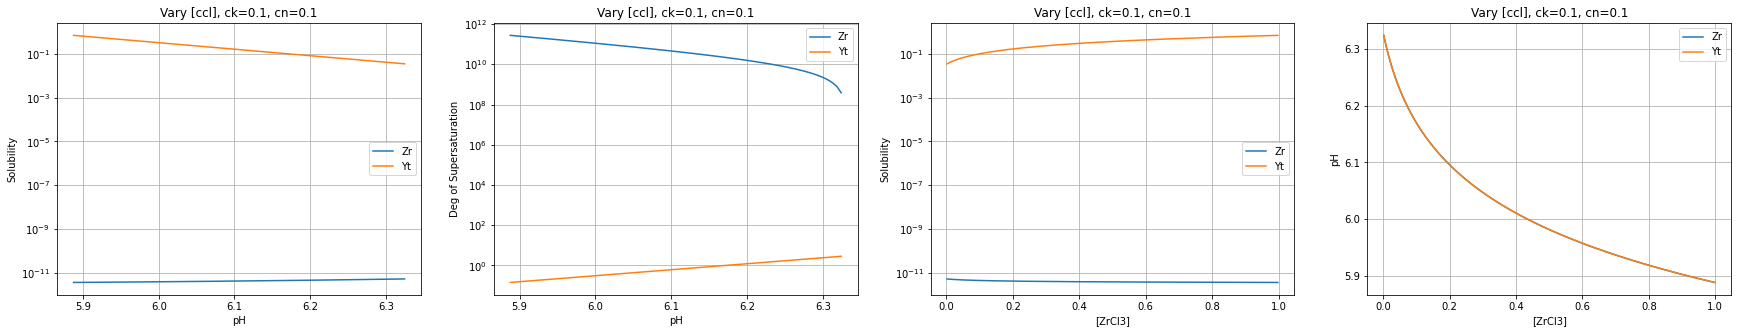

In [ ]:
plt.rcParams["figure.figsize"] = (30,5)
titlestr = 'Vary [ccl], ck=' + str(ck) + ', cn=' + str(cn)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
ax1.semilogy(pH_values,szr_values,pH_values,syt_values)
ax1.set(xlabel='pH', ylabel='Solubility', title=titlestr)
ax1.grid()
ax1.legend(['Zr','Yt'])

ax2.semilogy(pH_values,dss_zr_values,pH_values,dss_yt_values)
ax2.set(xlabel='pH', ylabel='Deg of Supersaturation', title=titlestr)
ax2.grid()
ax2.legend(['Zr','Yt'])

ax3.semilogy(ccl_values,szr_values,ccl_values,syt_values)
ax3.set(xlabel='[ZrCl3]', ylabel='Solubility', title=titlestr)
ax3.grid()
ax3.legend(['Zr','Yt'])

ax4.plot(ccl_values,pH_values,ccl_values, pH_values)
ax4.set(xlabel='[ZrCl3]', ylabel='pH', title=titlestr)
ax4.grid()
ax4.legend(['Zr','Yt'])

#Create surface plot for a range of Zirconium and Yttrium salts
Solve for a range of cn and ccl for a fixed ck value to generate a map

In [ ]:
yt = np.zeros(10)
zr = np.zeros(14)
pH_values = [] #list of pH values
ck_values = [] #list of KOH concentrations
cn_values =[] #list of Y(NO3)3 concentrations
ccl_values = [] #list of ZrCl3 concentrations
szr_values = [] #solubility of zirconium
syt_values = [] #solubility of yttrium
dss_zr_values = [] #degree of supersaturation - Zirconium
dss_yt_values = [] #degree of supersaturation - Yttrium

ck = 0.1 #ck defined (varies with slider)
for x in range (1,6):
  for y in range (1,6):
    ccl = x/100
    cn = y/100
    a = 1e-20 #lower bound concentration
    b = ck #upper bound concentration
    try:
      root,results = optimize.toms748(calc_yt_zr_netcharge,a,b,full_output=True)
      zr = calc_zr_conc(root)
      yt = calc_yt_conc(root)
      pH = -(kw - zr[12])
      szr = calc_zr_solubility(zr)
      dss_zr = ccl / szr
      syt = calc_yt_solubility(yt)
      dss_yt = cn / syt

      ccl_values.append(ccl)
      ck_values.append(ck)
      cn_values.append(cn)
      pH_values.append(pH)

      szr_values.append(szr)
      dss_zr_values.append(dss_zr)

      syt_values.append(syt)
      dss_yt_values.append(dss_yt)

      print('cn=', cn, ' ck =', ck ,' ,ccl=' , ccl , ' pH =', pH , 'szr=',szr,' net=', calc_yt_zr_netcharge(root))
    except:
      print('ck =',ck,' ,ccl=',ccl,', [OH-] =', zr[12], ' pH =', pH, 'net=', calc_yt_zr_netcharge(root), 'Skipping...')
      #print(results) #print to see number of iterations, confirm convergence
      continue

In [ ]:
X = np.reshape(cn_values,(5,5))

In [ ]:
X

array([[0.1, 0.2, 0.3, 0.4, 0.5],
       [0.1, 0.2, 0.3, 0.4, 0.5],
       [0.1, 0.2, 0.3, 0.4, 0.5],
       [0.1, 0.2, 0.3, 0.4, 0.5],
       [0.1, 0.2, 0.3, 0.4, 0.5]])

In [ ]:
Y = np.reshape(ccl_values,(5,5))

In [ ]:
Y

array([[0.1, 0.1, 0.1, 0.1, 0.1],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.3, 0.3, 0.3, 0.3, 0.3],
       [0.4, 0.4, 0.4, 0.4, 0.4],
       [0.5, 0.5, 0.5, 0.5, 0.5]])

In [ ]:
Z_ph = np.reshape(pH_values,(5,5))
Z_Szr = np.reshape(szr_values,(5,5))
Z_Syt = np.reshape(syt_values,(5,5))


In [ ]:
Z_ph

array([[6.1700477 , 6.06927172, 6.01039633, 5.96865517, 5.93629353],
       [6.09576293, 6.02749363, 5.98127726, 5.94629747, 5.91814845],
       [6.0468822 , 5.99510598, 5.95704554, 5.92693672, 5.90202765],
       [6.01039633, 5.96865517, 5.93629353, 5.90986362, 5.88752483],
       [5.98127726, 5.94629747, 5.91814845, 5.89459451, 5.87434585]])

In [ ]:
Z_Szr

array([[4.44189376e-12, 4.07395581e-12, 3.89918622e-12, 3.79092592e-12,
        3.71518291e-12],
       [4.16176545e-12, 3.94717361e-12, 3.82237111e-12, 3.73786410e-12,
        3.67566654e-12],
       [4.00428934e-12, 3.85809499e-12, 3.76295824e-12, 3.69454751e-12,
        3.64226678e-12],
       [3.89918622e-12, 3.79092592e-12, 3.71518291e-12, 3.65830414e-12,
        3.61355289e-12],
       [3.82237111e-12, 3.73786410e-12, 3.67566654e-12, 3.62739442e-12,
        3.58852764e-12]])

In [ ]:
Z_Syt

array([[0.10086379, 0.20128487, 0.30158553, 0.40181159, 0.50199085],
       [0.16782872, 0.26816151, 0.36840994, 0.46860351, 0.56875245],
       [0.23472844, 0.33500147, 0.43520869, 0.53537374, 0.63549858],
       [0.30158553, 0.40181159, 0.50199085, 0.60212721, 0.70223071],
       [0.36840994, 0.46860351, 0.56875245, 0.66886635, 0.76894489]])

Text(0, 0.5, 'ZROCl2')

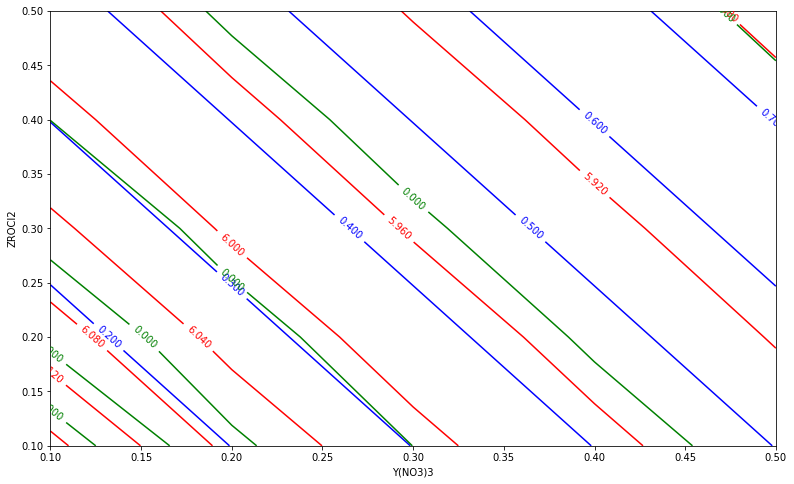

In [ ]:
fig, ax = plt.subplots(figsize=(13,8))
CS1 = ax.contour(X,Y,Z_ph, colors='red')
ax.clabel(CS1, CS1.levels, inline=True, fontsize=10)
CS2 = ax.contour(X,Y,Z_Syt, colors='blue')
ax.clabel(CS2, CS2.levels, inline=True, fontsize=10)
CS3 = ax.contour(X,Y,Z_Szr, colors='green')
ax.clabel(CS3, CS3.levels, inline=True, fontsize=10)
ax.set_xlabel("Y(NO3)3")
ax.set_ylabel("ZROCl2")